<h1>Data Science and Business Analytics Internship</h1>

<h3>Prediction using supervised Machine Learning</h3>

<h5>Author : Kavya Parikh</h5>

<h3>Step 1 : Importing the dataset</h3>

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing data
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)

In [3]:
#Showing that dataset has been successfully imported
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
ds.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
ds.shape

(25, 2)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h3>Step 2 : Visualizing the dataset</h3>

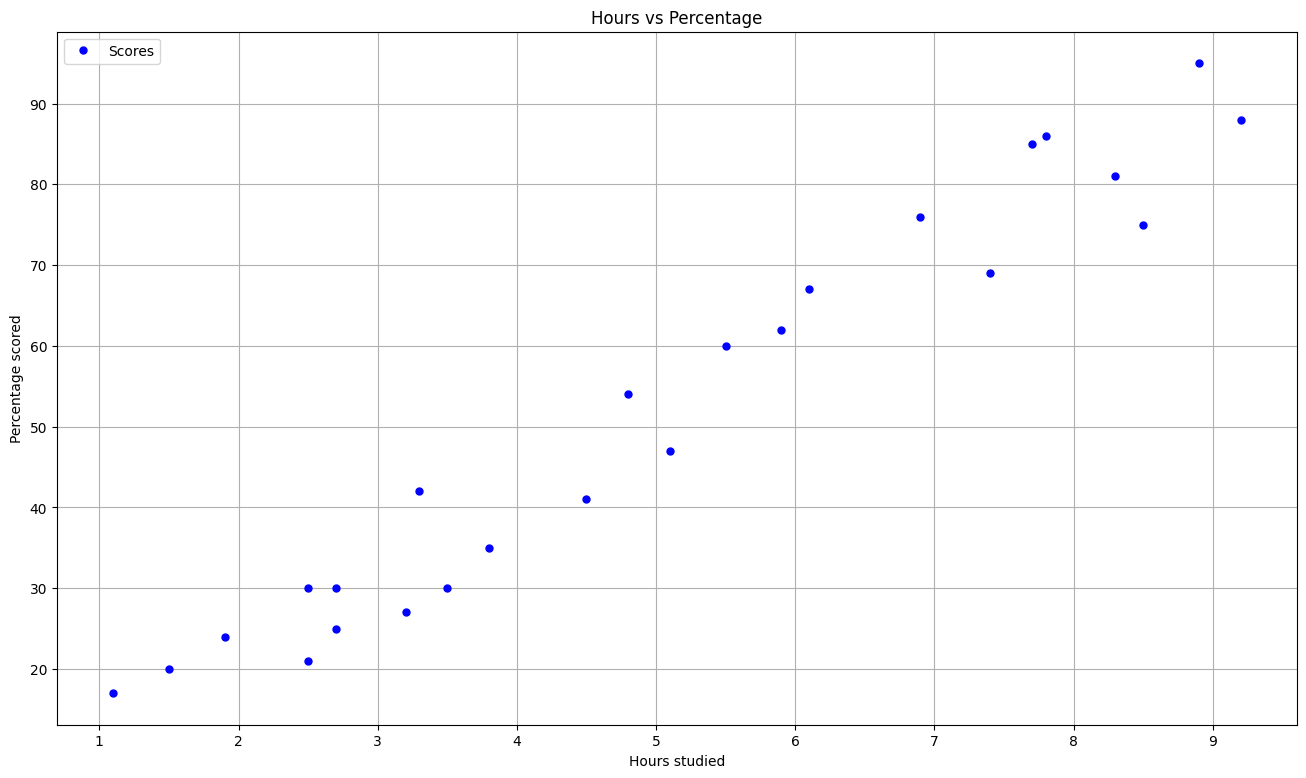

In [8]:
#Plotting score distribution
plt.rcParams["figure.figsize"]=[16,9]
ds.plot(x='Hours',y='Scores',style='.',color='blue',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.grid()
plt.show()

<h4>The graph shows a linear relation between hours studied and percentage scored. Hence linear regression can be used.</h4>

In [9]:
#Determines the correlation between variables
ds.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<h3>Step 3 : Data Preparation</h3>

In [10]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
#The data is split into attributes and labels.

X = ds.iloc[:,:1].values
y = ds.iloc[:,1:].values

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [14]:
#We now split it into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

<h3>Step 4 : Training the algorithm</h3>

In [15]:
#Training the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h3>Step 5 : Visualizing the model</h3>

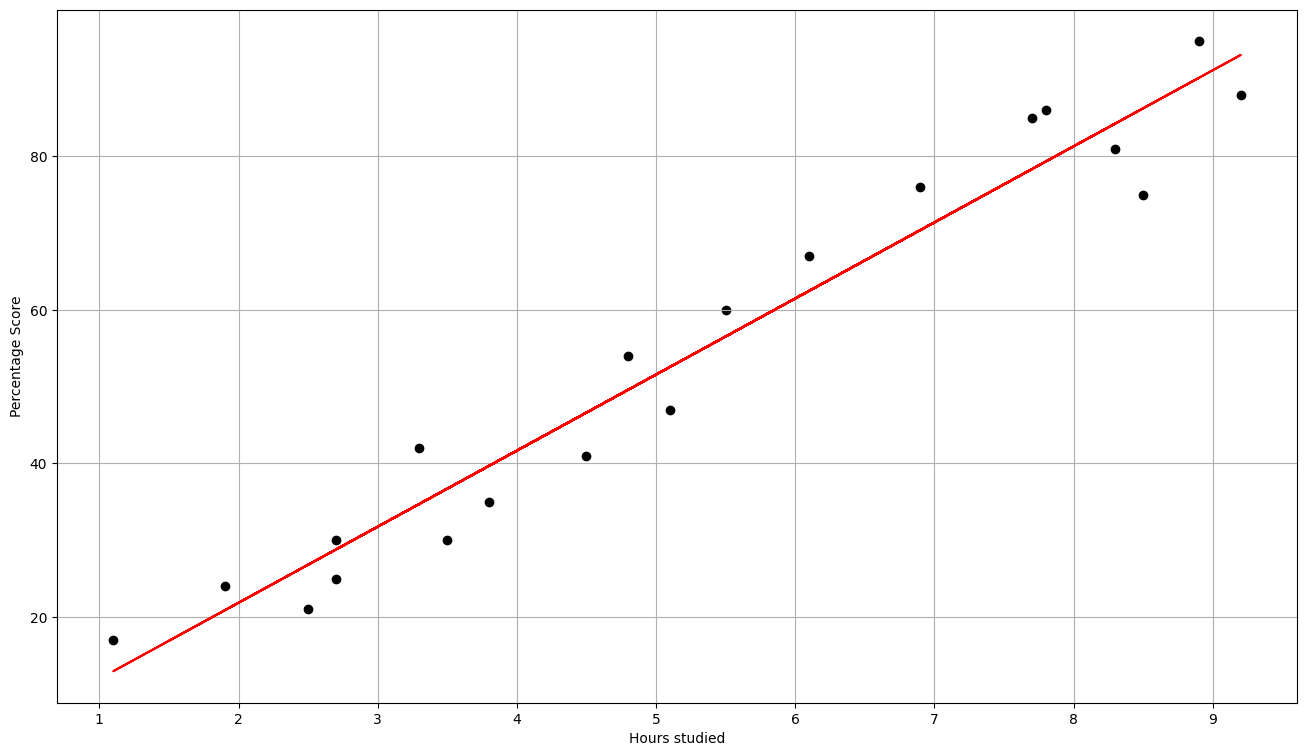

In [16]:
#Plotting the regresson line
line=model.coef_*X + model.intercept_

#Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train,y_train,color="black")
plt.plot(X,line,color="red")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

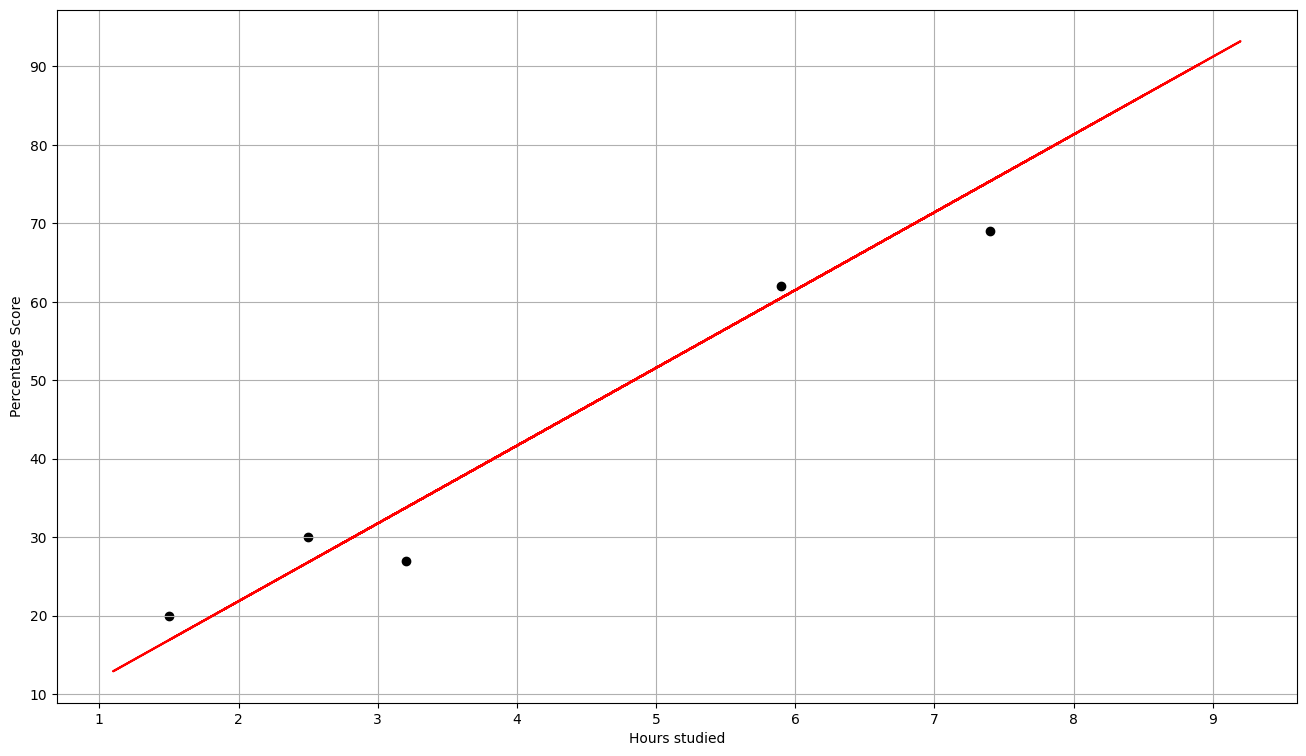

In [17]:
#Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test,y_test,color="black")
plt.plot(X,line,color="red")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

<h3>Step 6 : Making Predictions</h3>

In [18]:
print(X_test)
y_pred=model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
#Comparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [20]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [21]:
#Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [22]:
#Testing with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


<h3>Step 7 : Evaluating the model</h3>

In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
